# [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course)

In [1]:
# Code you have previously used to load data
import pandas as pd
import numpy as np

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

from sklearn import linear_model

from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Загрузка данных

In [2]:
# данные, которые раньше были с nan
train_data_with_nan = pd.read_csv("./hpc_train_data_with_nan.csv") 
train_data_with_nan

,SalePrice,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageYrBlt,GarageFinish,GarageCond,PoolQC,Fence
0,208500,65.0,196.0,4,3,1,6,1,4,0,2003.0,2,3,0,0
1,181500,80.0,0.0,4,3,4,5,1,4,3,1976.0,2,3,0,0
2,223500,68.0,162.0,4,3,2,6,1,4,3,2001.0,2,3,0,0
3,140000,60.0,0.0,3,4,1,5,1,4,4,1998.0,1,3,0,0
4,250000,84.0,350.0,4,3,3,6,1,4,3,2000.0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,62.0,0.0,4,3,1,1,1,4,3,1999.0,2,3,0,0
1456,210000,85.0,119.0,4,3,1,5,3,4,3,1978.0,1,3,0,3
1457,266500,66.0,0.0,3,4,1,6,1,4,4,1941.0,2,3,0,4
1458,142125,68.0,0.0,3,3,2,6,3,3,0,1950.0,1,3,0,0


In [3]:
y = train_data_with_nan.SalePrice
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [4]:
train_data_with_nan.drop(columns=['SalePrice'], inplace=True)
train_data_with_nan

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageYrBlt,GarageFinish,GarageCond,PoolQC,Fence
0,65.0,196.0,4,3,1,6,1,4,0,2003.0,2,3,0,0
1,80.0,0.0,4,3,4,5,1,4,3,1976.0,2,3,0,0
2,68.0,162.0,4,3,2,6,1,4,3,2001.0,2,3,0,0
3,60.0,0.0,3,4,1,5,1,4,4,1998.0,1,3,0,0
4,84.0,350.0,4,3,3,6,1,4,3,2000.0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,4,3,1,1,1,4,3,1999.0,2,3,0,0
1456,85.0,119.0,4,3,1,5,3,4,3,1978.0,1,3,0,3
1457,66.0,0.0,3,4,1,6,1,4,4,1941.0,2,3,0,4
1458,68.0,0.0,3,3,2,6,3,3,0,1950.0,1,3,0,0


In [5]:
# числовые данные, которые раньше были без nan
train_data_without_nan = pd.read_csv("./hpc_train_data_without_nan.csv") 
train_data_without_nan

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,2010


In [6]:
train_data = pd.DataFrame()
train_data = train_data.append(train_data_with_nan)
train_data = train_data.join(train_data_without_nan)
train_data

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageYrBlt,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,196.0,4,3,1,6,1,4,0,2003.0,...,548,0,61,0,0,0,0,0,2,2008
1,80.0,0.0,4,3,4,5,1,4,3,1976.0,...,460,298,0,0,0,0,0,0,5,2007
2,68.0,162.0,4,3,2,6,1,4,3,2001.0,...,608,0,42,0,0,0,0,0,9,2008
3,60.0,0.0,3,4,1,5,1,4,4,1998.0,...,642,0,35,272,0,0,0,0,2,2006
4,84.0,350.0,4,3,3,6,1,4,3,2000.0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,4,3,1,1,1,4,3,1999.0,...,460,0,40,0,0,0,0,0,8,2007
1456,85.0,119.0,4,3,1,5,3,4,3,1978.0,...,500,349,0,0,0,0,0,0,2,2010
1457,66.0,0.0,3,4,1,6,1,4,4,1941.0,...,252,0,60,0,0,0,0,2500,5,2010
1458,68.0,0.0,3,3,2,6,3,3,0,1950.0,...,240,366,0,112,0,0,0,0,4,2010


## XGBoost

In [7]:
features = list(train_data.columns) 
features

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [8]:
X = train_data[features]
X

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageYrBlt,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,196.0,4,3,1,6,1,4,0,2003.0,...,548,0,61,0,0,0,0,0,2,2008
1,80.0,0.0,4,3,4,5,1,4,3,1976.0,...,460,298,0,0,0,0,0,0,5,2007
2,68.0,162.0,4,3,2,6,1,4,3,2001.0,...,608,0,42,0,0,0,0,0,9,2008
3,60.0,0.0,3,4,1,5,1,4,4,1998.0,...,642,0,35,272,0,0,0,0,2,2006
4,84.0,350.0,4,3,3,6,1,4,3,2000.0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,4,3,1,1,1,4,3,1999.0,...,460,0,40,0,0,0,0,0,8,2007
1456,85.0,119.0,4,3,1,5,3,4,3,1978.0,...,500,349,0,0,0,0,0,0,2,2010
1457,66.0,0.0,3,4,1,6,1,4,4,1941.0,...,252,0,60,0,0,0,0,2500,5,2010
1458,68.0,0.0,3,3,2,6,3,3,0,1950.0,...,240,366,0,112,0,0,0,0,4,2010


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
model = XGBRegressor(learning_rate = 0.01, max_depth = 5, n_estimators = 600)

In [30]:
%time model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

CPU times: user 6.27 s, sys: 322 ms, total: 6.59 s
Wall time: 2.35 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_true=y_test, y_pred=y_pred)}")
print(f'R2: {r2_score(y_true=y_test, y_pred=y_pred)}')

MAE: 16422.416845034248
R2: 0.9037639734452172


## Обработка тестовых данных

In [34]:
test_data = pd.read_csv("./../../../data/hpc_test.csv")
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [35]:
cols_with_missing = [col for col in test_data.columns
                     if test_data[col].isnull().any()]
cols_with_missing

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

<AxesSubplot:>

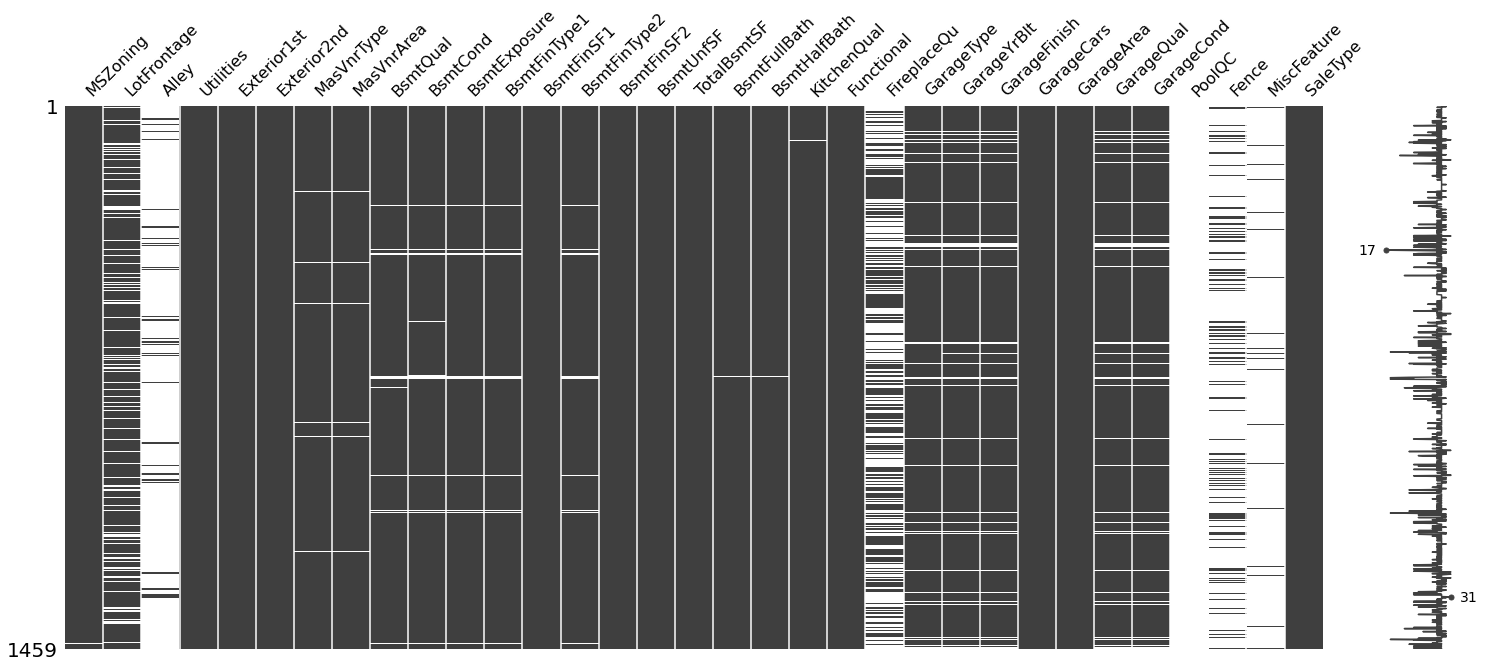

In [37]:
import missingno as msno
msno.matrix(test_data[cols_with_missing])

In [14]:
def save_submission_xgboost(model_name, model, features):
    # read test data file using pandas
    test_data = pd.read_csv("./../../../data/hpc_test.csv")

    # create test_X which comes from test_data but includes only the columns you used for prediction.
    # The list of columns is stored in a variable called features

    test_X = test_data[features]
    
    # make predictions which we will submit. 
    test_preds = model.predict(test_X)

    # The lines below shows you how to save your data in the format needed to score it in the competition
    output = pd.DataFrame({'Id': test_data.Id,
                           'SalePrice': test_preds})
    
    output_file = f'submission_{model_name}.csv'
    output.to_csv(output_file, index=False)
    
    print(f'{output_file} saved!')

In [15]:
save_submission_xgboost('xgboost', model, features)

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageFinish, GarageCond, PoolQC, Fence